# Complex Sentiment Analysis

#### Opening data files

Instead of getting the data from the web in the script, I suggest you just download it and save it in the folder your script is in. Here are the links:

Positive data http://www.unc.edu/~ncaren/haphazard/positive.txt

Negative data http://www.unc.edu/~ncaren/haphazard/negative.txt



##### Now we load the negative words

In [1]:
with open("negative.txt", "r") as f:
    negText = f.read()
negTokens = negText.split("\n") # This splits the text file into tokens on the new line character
negTokens[-1:] = [] # This strips out the final empty item
print(negTokens[-10:])

['wretched', 'wretchedly', 'wretchedness', 'wrong', 'wrongful', 'wrought', 'wrought', 'yawn', 'zealot', 'zealous']


###### Now we load the positive words

In [2]:
with open("positive.txt", "r") as f:
    posText = f.read()
posTokens = posText.split("\n") # This splits the text file into tokens on the new line character
posTokens[-1:] = [] # This strips out the final empty item
print(posTokens[-10:])

['worthiness', 'worthwhile', 'worthy', 'wow', 'wry', 'yearning', 'yearningly', 'youthful', 'zeal', 'zenith']


###### Here we get the tweets

In [3]:
with open("trumpTweets.txt", "r") as f:
    tweetsText = f.read()
tweetsTokens = tweetsText.split("\n") # This splits the text file into tokens on the new line character
tweetsTokens[-1:] = [] # This strips out the final empty item
print(tweetsTokens[:6])

['"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"']


## Tokenizing the tweets

Now we will create two functions. The first for tokenizing a tweet, the second for calculating positive/negative words.

In [4]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum

# Here is a line for testing this
# print(calculator('"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"'))

## Analyzing tweets

Now we will use the calculator to calculate how many positive and negative tweets.
Note: that you can set a threshold for the number of words for a Tweet to be considered positive or negative.

In [5]:
# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

# This prints out the results        
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))

Total: 261169
Positive: 11771
Neutral: 197640
Negative: 51758


#### Gathering positive tweets

This will gather all examples of positive tweets.

In [6]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi and numPosTweets < numberWanted:
        numPosTweets += 1
        posiTweetList.append(tweet)

print(posiTweetList)

['RT @JoyAnnReid: And again, Trump supporters likely will never hear about this from their preferred media outlets, though many will discoverƒ', '@LibyaLiberty I would have loved the center to praise trump too BUT he did NOT  GIVE them reason to praise him.', "RT @Brasilmagic: To keep Donald happy, Trump's staff has to ensure he's always receiving praise and adulation - feed the narcisissm. https:ƒ", 'RT @ThomasWictor: Just watch: Terrorists will begin carrying out mass-casualty attacks in Europe, and Europeans will blame Trump while notƒ']


#### Gathering negative tweets

This will gather examples of negative tweets.

In [7]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc < nega and numNegTweets < numberWanted:
        numNegTweets += 1
        negaTweetList.append(tweet)

print(negaTweetList)

['"RT @alfonslopeztena: Dumped by Trump, jilted Europe and rejected Asia get together on trade deals threatening to leave US out in the cold', 'RT @snukasuper: #CNNLeaks Don Leming &amp; his band of @POTUS Trump haters on @CNN need to be exposed to the entire world https://t.co/EhH5iSdMƒ', 'RT @HIGH_TIMES_Mag: Idaho Governor Requests for Trump to Crackdown on Weed. https://t.co/fuyJdBv04M https://t.co/veJrKv7RsQ', 'RT @Lawrence: Trump calls us "the enemy of the American people" because we are enemies of Trump lies. https://t.co/GOGt4Rubcm']


#### Testing a tweet

Here you can take a tweet and test it to see how many positive or negative words it has.

In [8]:
tweetToCalc = input("What is the tweet to calculate? ")
print(calculator(tweetToCalc))

What is the tweet to calculate? What is the tweet to calculate? RT @jmichaelkell: To sum it up:  1. Trump - sexual predator 2. Epstein - convicted pedophile 3. Milo - pedophilia supporter 4. Huckabee - pƒ
1


#### Gathering and plotting positive and negative words

This will gather the words that are positive in the tweets and tabulate them.

In [9]:
import re
posWordsList = []
negWordsList = []

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def wordsCalculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)

tweet2Process = input("What tweet do you want to process? ")
wordsCalculator(tweet2Process)
print("Positive words: " + str(posWordsList[:10]))
print("Negative words: " + str(negWordsList[:10]))

What tweet do you want to process? What is the tweet to calculate? RT @jmichaelkell: To sum it up:  1. Trump - sexual predator 2. Epstein - convicted pedophile 3. Milo - pedophilia supporter 4. Huckabee - pƒ
Positive words: ['supporter']
Negative words: []


## Gathering and plotting all positive and negative words

In [10]:
import re

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
posWordsList = []
negWordsList = []
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

def wordsGathering(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)       
    
    sum = (numPosWords - numNegWords)
    return sum

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = wordsGathering(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 96120
Negative words: 99818


###### Positive words

    will     just    right  support     even security     good    great     real     help 
    9048     8559     2832     2054     1950     1937     1925     1734     1323     1287 


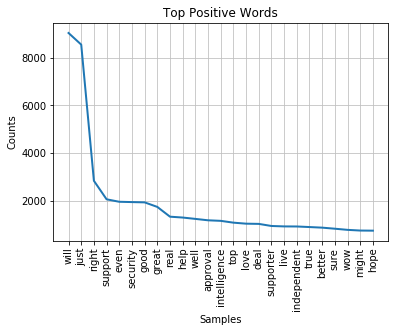

In [11]:
import nltk, matplotlib

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posDist.plot(25, title="Top Positive Words")

###### Negative words

  against      down    attack      fake      need       war       bad seriously      lies    trying 
     4039      2350      2007      2001      1959      1776      1439      1162      1023       958 


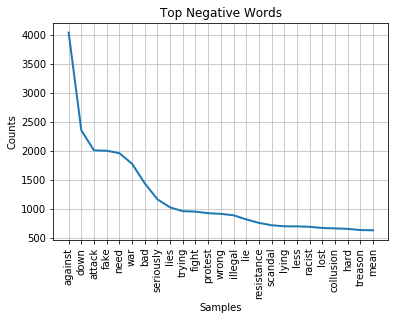

In [12]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
negDist.plot(25, title="Top Negative Words")